Part A: Implement metropolis algorithm

In [1]:
import numpy as np

def metropolis(pi, proposal_std, x0, n_samples):
    """
    Metropolis algorithm for sampling from a target density π(x)
    (only proportional to the true density).
    """

    samples = np.zeros(n_samples)
    x = x0
    accepted = 0

    for i in range(n_samples):
        # 1. Propose a new point
        x_new = x + np.random.normal(0, proposal_std)

        # 2. Compute acceptance probability
        alpha = min(1, pi(x_new) / pi(x))

        # 3. Accept or reject
        if np.random.rand() < alpha:
            x = x_new
            accepted += 1

        samples[i] = x

    acceptance_rate = accepted / n_samples
    return samples, acceptance_rate


Acceptance rate: 0.7026


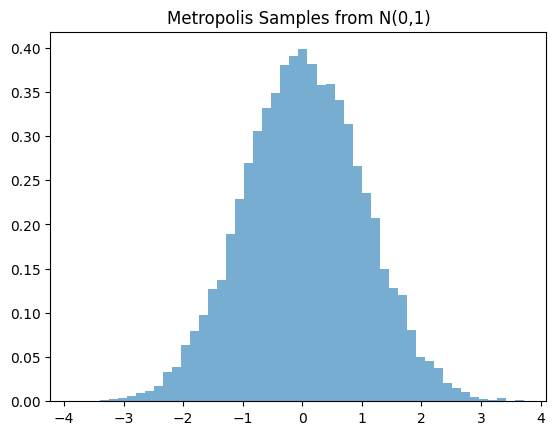

In [2]:
import matplotlib.pyplot as plt

# unnormalized standard normal target density
def pi(x):
    return np.exp(-0.5 * x**2)

samples, acc = metropolis(pi, proposal_std=1.0, x0=0.0, n_samples=30000)
print("Acceptance rate:", acc)

plt.hist(samples, bins=50, density=True, alpha=0.6)
plt.title("Metropolis Samples from N(0,1)")
plt.show()


Part B: Deterministics model

In [3]:
def logistic_growth(x0, r, T):
    """
    Deterministic logistic growth model:
    x_{t+1} = r * x_t * (1 - x_t)

    Inputs:
        x0 : initial value (0 < x0 < 1)
        r  : growth parameter
        T  : number of steps

    Returns:
        xs : list of deterministic values over time
    """
    xs = [x0]
    x = x0

    for _ in range(T):
        x = r * x * (1 - x)
        xs.append(x)

    return xs


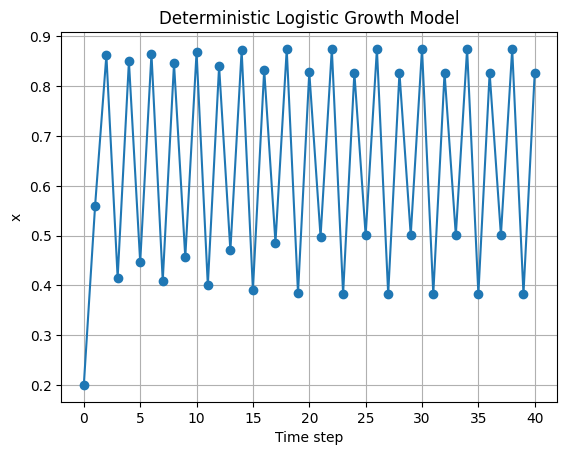

In [4]:
import matplotlib.pyplot as plt

trajectory = logistic_growth(x0=0.2, r=3.5, T=40)

plt.plot(trajectory, marker='o')
plt.title("Deterministic Logistic Growth Model")
plt.xlabel("Time step")
plt.ylabel("x")
plt.grid(True)
plt.show()
